# Ensemble

The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

### Methods of Ensemble 
     1. Bagging (Averaging)
     2. Boosting
     3. Stacking
     
BIAS: Unability to predict OR error with Prediction. (Underfit)

VARIANCE: Sensitivity of model towards new data. (Overfit)

## Relation Between Bias and Variance
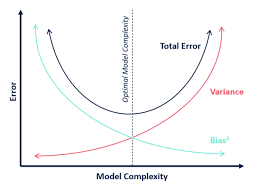

## 1) Bagging

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
x=df.drop("Outcome", axis="columns")   #independent variable
y=df.Outcome    #dependent variable
#y=mx+c

In [6]:
print(x,"\n",y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


### Types of Scaling:
    1. Normalization
    2. Standardization

### 1. Standardization

In [8]:
#Dataset Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled= scaler.fit_transform(x)

In [9]:
x_scaled[:3]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415]])

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,stratify=y,random_state=10)

In [12]:
x_train.shape

(576, 8)

In [14]:
x_test.shape

(192, 8)

In [15]:
#Model building using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [18]:
#Cross Validation

from sklearn.model_selection import cross_val_score
scores=cross_val_score(DecisionTreeClassifier(),x,y,cv=5)
scores

array([0.69480519, 0.67532468, 0.68181818, 0.77777778, 0.73202614])

In [20]:
scores.mean()

0.7123503947033358

In [21]:
#Implementing Bagging

from sklearn.ensemble import BaggingClassifier

In [58]:
b_m= BaggingClassifier(
base_estimator=DecisionTreeClassifier(),
n_estimators=100,
max_samples=0.8,
bootstrap=True,
oob_score=True,
random_state=3)   #random_state value will affect the sampling thus accuracy is affected. 

In [59]:
#Fitting the model
b_m.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, oob_score=True, random_state=3)

In [60]:
#Accuracy
b_m.oob_score_

0.7395833333333334

In [61]:
#We can also check the accuracy score using the testing dataset
b_m.score(x_test,y_test)
#Overfitting happens when accuracy on testing dataset increases

0.8020833333333334

## 2) Boosting 

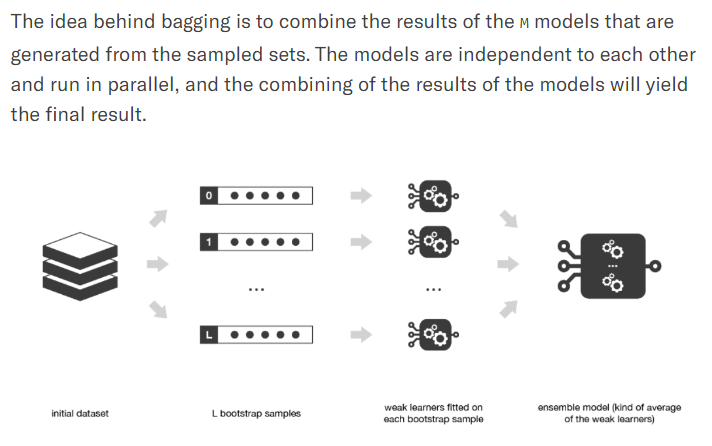

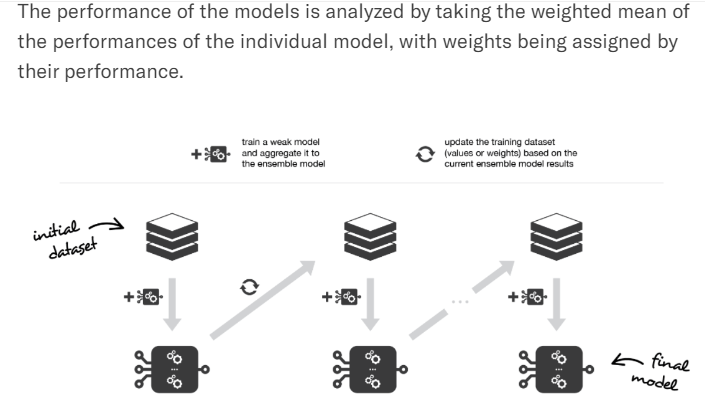

## Adaptive Boosting/ AdaBoosting

AdaBoost, short for Adaptive Boosting, was one of the first boosting methods that saw success in improving the performance of models. AdaBoost focuses on enhancing the performance in areas where the base learner fails. A base learner is the first iteration of the model.

AdaBoost is resistant to overfitting as the number of iterations increase and are most effective when it works on a binary classification problem. AdaBoost includes an extra condition where a model is required to have an error of less than 50% to maintain it, otherwise, the iterations are repeated until a better learner is generated.

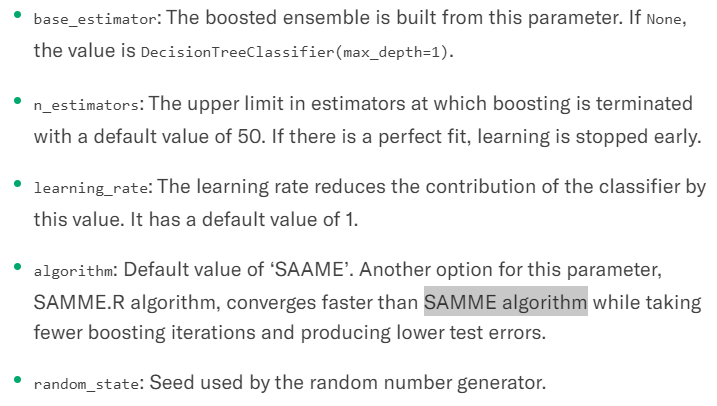

In [7]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [12]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [22]:
import pandas as pd
import numpy as np
import sklearn

In [23]:
df = pd.read_csv("mushrooms.csv")
#print(df.head())
for col in df.columns:
    print('Unique value count of', col, 'is', len(df[col].unique()))

Unique value count of class is 2
Unique value count of cap-shape is 6
Unique value count of cap-surface is 4
Unique value count of cap-color is 10
Unique value count of bruises is 2
Unique value count of odor is 9
Unique value count of gill-attachment is 2
Unique value count of gill-spacing is 2
Unique value count of gill-size is 2
Unique value count of gill-color is 12
Unique value count of stalk-shape is 2
Unique value count of stalk-root is 5
Unique value count of stalk-surface-above-ring is 4
Unique value count of stalk-surface-below-ring is 4
Unique value count of stalk-color-above-ring is 9
Unique value count of stalk-color-below-ring is 9
Unique value count of veil-type is 1
Unique value count of veil-color is 4
Unique value count of ring-number is 3
Unique value count of ring-type is 5
Unique value count of spore-print-color is 9
Unique value count of population is 6
Unique value count of habitat is 7


In [32]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [24]:
df.shape

(8124, 23)

In [25]:
df = df.drop("veil-type", axis=1)

In [26]:
# Data is categorical, lets convert it in numerical value
label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

In [27]:
# Splitting the dataset into target and feature sets
X = df.loc[:, df.columns != 'class']
Y = df['class']

In [28]:
print(X.shape)

(8124, 21)


In [29]:
print(Y.shape)

(8124,)


In [30]:
## Scaling the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3,random_state = 100)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
adaboost = AdaBoostClassifier(n_estimators = 10, learning_rate = 0.01).fit(X_train, Y_train)
score = adaboost.score(X_test, Y_test)

In [21]:
score

0.7842493847415914

 Made By TSS